# Exploratory Data Analysis of Dataset A
    * Investigate distributions and outliers of datasets A and B 
    * Dataset A is formed from merging three datasets: Adjusted Cohort Graduation Rate, Common Core of Data School Directory, and the Math and Reading State Assessment Participation data from EdFacts
    * The intermediate dataframe that is loaded here was produced from the *ingestion.ipynb* notebook
    * Dataset B is formed from:

In [1]:
import sys,os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from swampy import structshape as ss
import missingno

In [2]:
df = pd.read_csv("../data/mergeA.csv")

In [3]:
pd.set_option('display.max_columns',99)
df.head(n=3)

,Year,STNAM,FIPST,LEAID,LEANM,NCESSCH,SCHNAM,ALL_COHORT_,school_name,zip_mailing,zip_location,latitude,urban_centric_locale,county_code,school_level,school_type,lowest_grade_offered,highest_grade_offered,title_i_status,title_i_eligible,charter,magnet,virtual,teachers_fte,free_lunch,reduced_price_lunch,free_or_reduced_price_lunch,enrollment,ungrade_cedp,Math_Pct_Part,Rla_Pct_Part,ALL_RATE_
0,2012,ALASKA,2,200001,Lower Kuskokwim School District,20000100208,Bethel Regional High School,75,BETHEL REGIONAL HIGH SCHOOL,99559.0,99559.0,60.802584,41.0,2050.0,4.0,1.0,6.0,12.0,5.0,1.0,0.0,0.0,0.0,32.849998,210.0,28.0,238.0,506.0,0.0,97.5,97.5,52.0
1,2012,ALASKA,2,200001,Lower Kuskokwim School District,20000100318,Bethel Alternative Boarding School,28,BETHEL ALTERNATIVE BOARDING SCHOOL,99559.0,99559.0,60.795960,33.0,2050.0,3.0,4.0,8.0,12.0,5.0,1.0,0.0,0.0,0.0,4.000000,58.0,0.0,58.0,61.0,0.0,90.0,90.0,10.0
2,2012,ALASKA,2,200006,Mount Edgecumbe High School Agency,20000600558,Mt. Edgecumbe High School,71,MT. EDGECUMBE HIGH SCHOOL,99835.0,99835.0,57.051810,41.0,2220.0,3.0,1.0,9.0,12.0,5.0,1.0,0.0,0.0,0.0,22.500000,224.0,35.0,259.0,398.0,0.0,97.5,97.5,97.5


In [4]:
df.shape, df.dtypes

((83658, 32),
 Year                             int64
 STNAM                           object
 FIPST                            int64
 LEAID                            int64
 LEANM                           object
 NCESSCH                          int64
 SCHNAM                          object
 ALL_COHORT_                      int64
 school_name                     object
 zip_mailing                    float64
 zip_location                   float64
 latitude                       float64
 urban_centric_locale           float64
 county_code                    float64
 school_level                   float64
 school_type                    float64
 lowest_grade_offered           float64
 highest_grade_offered          float64
 title_i_status                 float64
 title_i_eligible               float64
 charter                        float64
 magnet                         float64
 virtual                        float64
 teachers_fte                   float64
 free_lunch               

Text(0.5, 1.0, 'Graduation Rate')

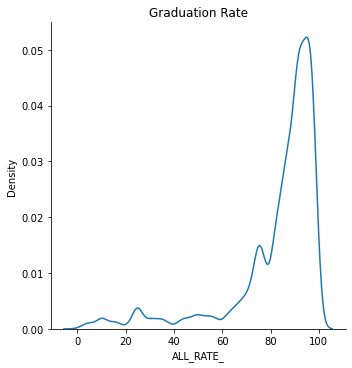

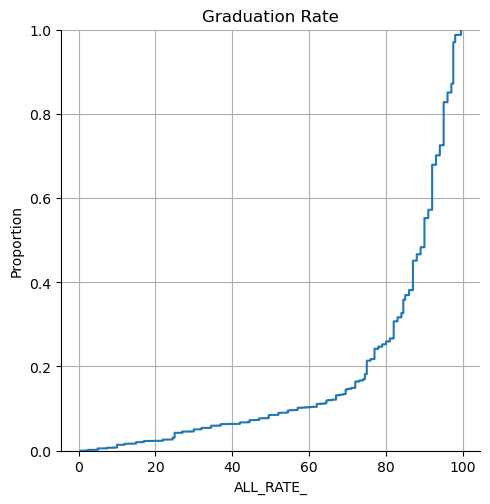

In [5]:
sns.displot(df.ALL_RATE_,kind="kde")
plt.title("Graduation Rate")
sns.displot(df.ALL_RATE_,kind='ecdf')
plt.grid(visible=True)
plt.title("Graduation Rate")

* Our target variable has a strong left-skew, so we may need to transform it with a log, Box-Cox, or Yeo-Johnson during modeling.
* 20% of schools have a graduation rate below 76% 

Text(0.5, 1.0, 'Cohort Size')

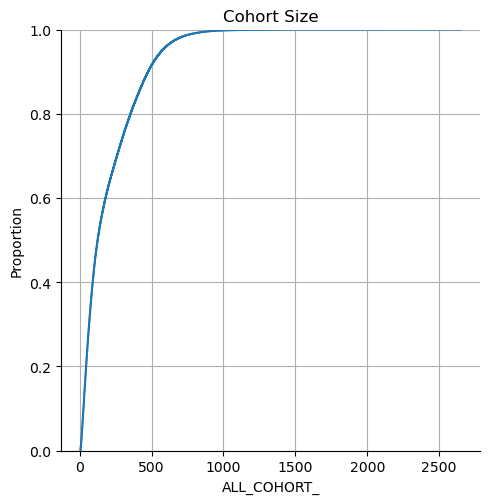

In [6]:
sns.displot(df.ALL_COHORT_,kind='ecdf')
plt.grid(visible=True)
plt.title("Cohort Size")

80% of schools have a cohort size under ~480
Max cohort size: 2651
Min cohort size: 6


In [7]:
df.ALL_COHORT_.describe()

count    83658.000000
mean       199.598939
std        189.716057
min          6.000000
25%         55.000000
50%        126.000000
75%        305.000000
max       2651.000000
Name: ALL_COHORT_, dtype: float64

Text(0.5, 1.0, 'Instances per State')

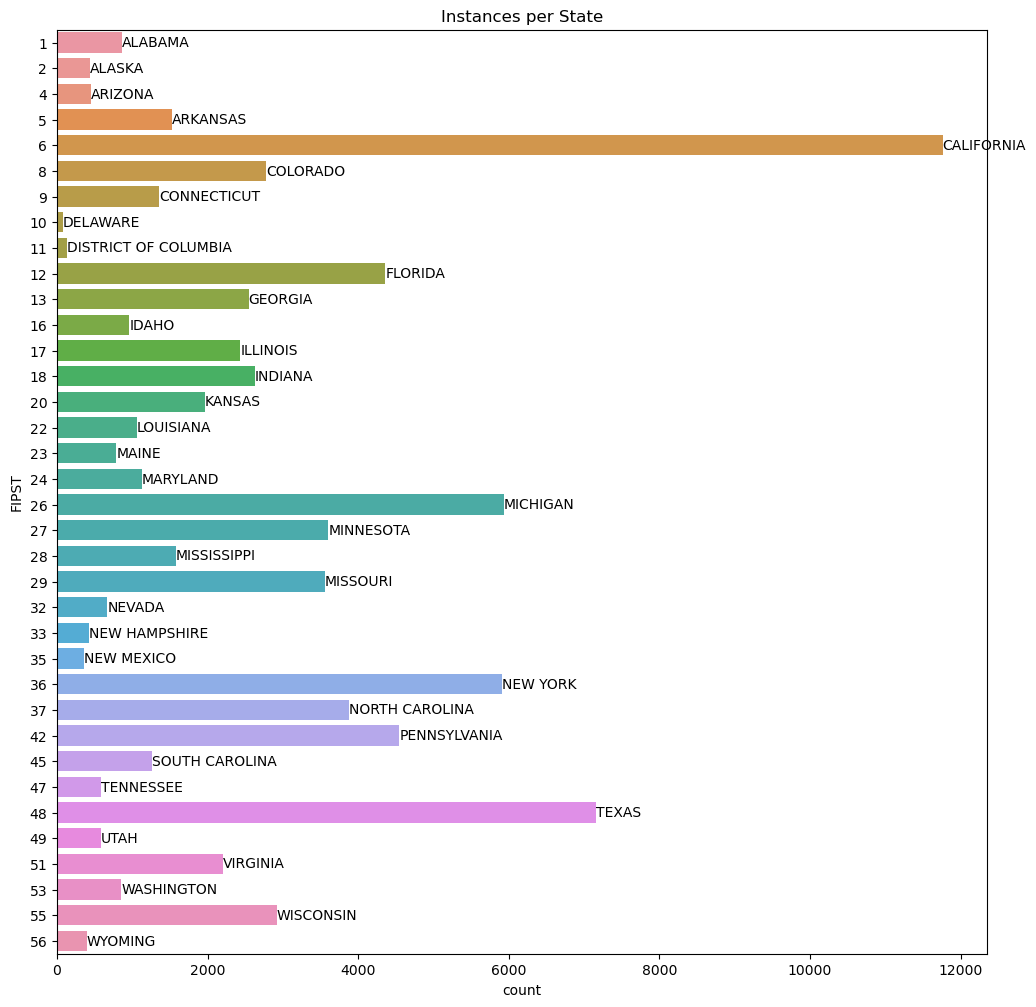

In [8]:
def create_fipst_to_stnam_dict(df):
    """
    Verify that state codes match state names in a one-to-one fashion. 
    Return dictionary mapping FIPST to STNAM.
    """
    fipst_to_name = {}
    for fipst, name in zip(df.FIPST,df.STNAM):
        if fipst in fipst_to_name:
            try:
                assert name == fipst_to_name[fipst]
            except:
                print("found name {} for fipst {} but {} was in dictionary already".format(name,fipst,fipst_to_name[fipst]))
        else:
            fipst_to_name[fipst] = name
    return fipst_to_name

fipst_to_name = create_fipst_to_stnam_dict(df)


plt.rcParams['figure.figsize'] = (12,12)
ax = sns.countplot(y=df.FIPST)
labels = sorted(fipst_to_name.items())
labels = [v for k,v in labels]
ax.bar_label(container=ax.containers[0], labels=labels)
plt.title("Instances per State")

Text(0.5, 0, 'Percent (0-100)')

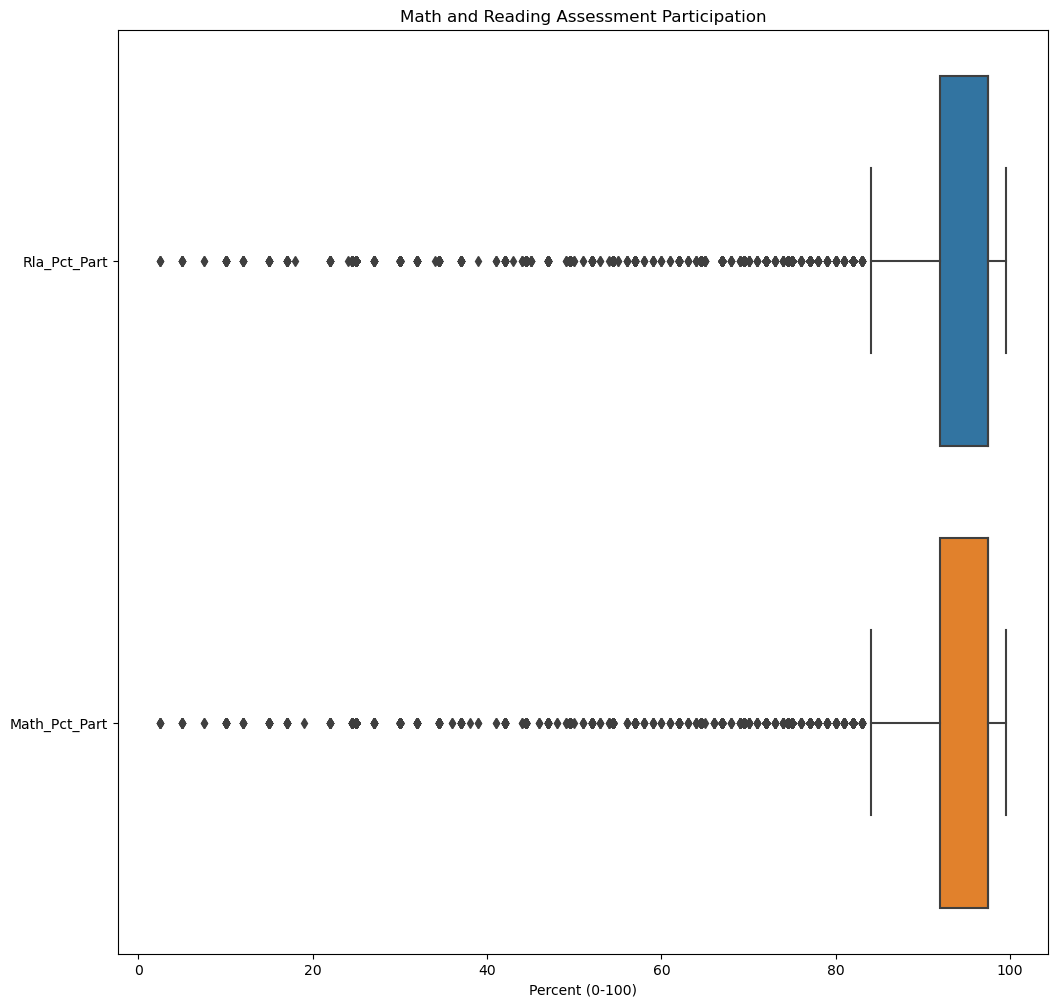

In [9]:
# @TODO: Two boxplots for Math and Reading Language Arts Participation
df.Math_Pct_Part.describe(), df.Rla_Pct_Part.describe()

sns.boxplot(data=df[["Rla_Pct_Part", "Math_Pct_Part"]], orient="h")
plt.title("Math and Reading Assessment Participation")
plt.xlabel("Percent (0-100)")

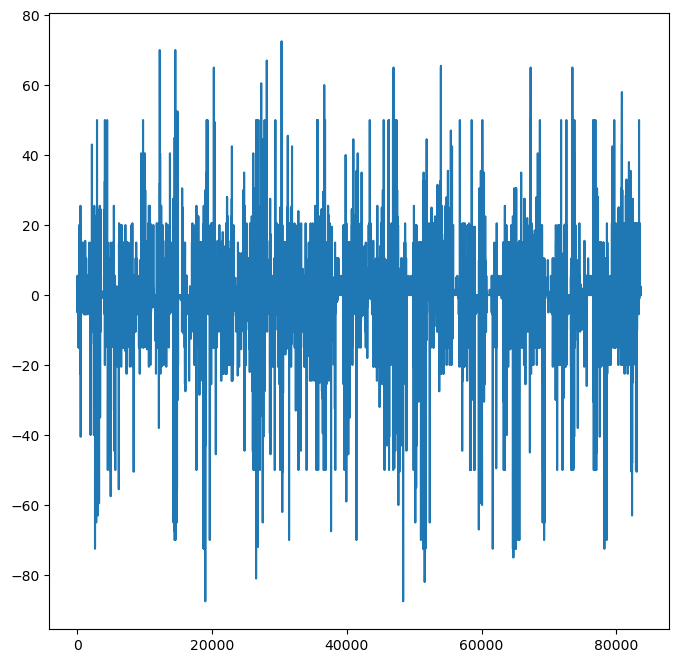

In [10]:
# For State proficiency test taking, does Math Percent Participation equal 
# Reading and Language Arts Percent Participation?
plt.rcParams["figure.figsize"] = (8,8)
plt.plot(df.Math_Pct_Part - df.Rla_Pct_Part)

[(11.0, 74.52501954652072),
 (12.0, 76.28134866937303),
 (13.0, 78.55891299939161),
 (21.0, 82.79176470588236),
 (22.0, 83.04348666408968),
 (23.0, 82.0689552238806),
 (31.0, 85.50549828178694),
 (32.0, 84.1909758656873),
 (33.0, 81.31286295005808),
 (41.0, 86.97798681148177),
 (42.0, 87.70930640913082),
 (43.0, 85.38989337042189)]

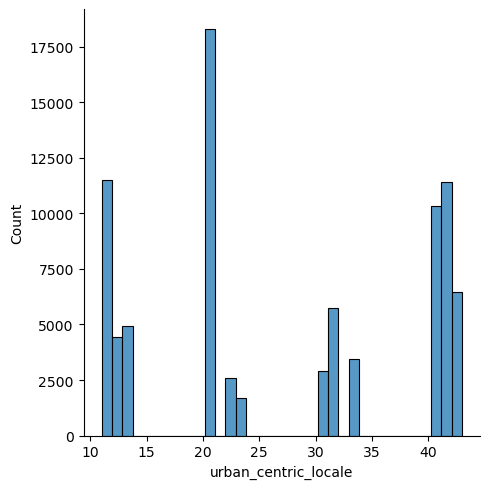

In [11]:
# Look at urban district distribution. This feature describes how rural a location is.
sns.displot(df.urban_centric_locale)
# What is is graduation rate average for each urban centric locale?
[(name, df.ALL_RATE_.mean()) for name, df in df.groupby('urban_centric_locale')]

/home/bb/miniconda3/envs/my-env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ungrade_cedp', ylabel='count'>

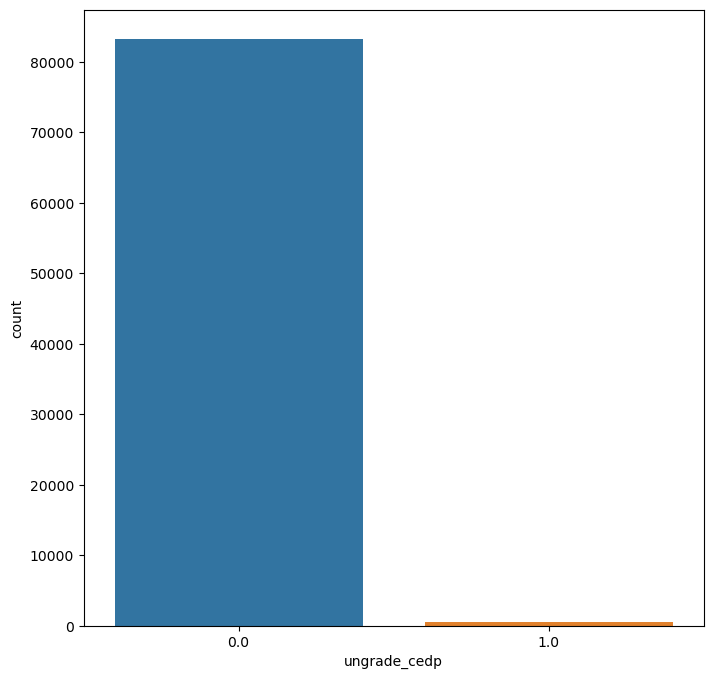

In [12]:
sns.countplot(df.ungrade_cedp)

Ungraded is a very rare label. Feature may need to be dropped during modeling. 

In [13]:
# What is is graduation rate average for graded versus ungraded schools?
[(name, df.ALL_RATE_.mean()) for name, df in df.groupby('ungrade_cedp')]

[(0.0, 82.5223094116516), (1.0, 91.30203619909503)]

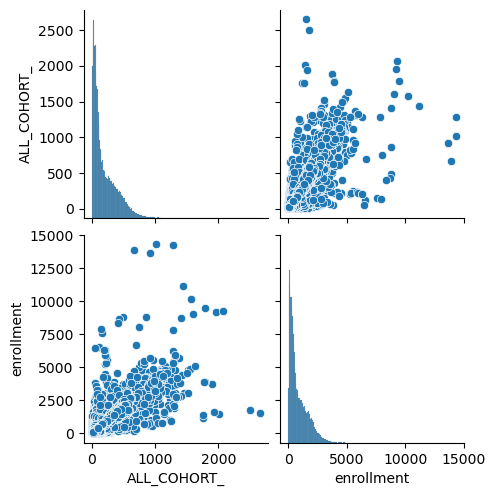

In [14]:
# We expect total enrollment of school and graduation cohort size to be related.
sns.pairplot(df[['ALL_COHORT_','enrollment']])

In [15]:
df[['ALL_COHORT_','enrollment']].corr()

,ALL_COHORT_,enrollment
ALL_COHORT_,1.00000,0.94549
enrollment,0.94549,1.00000


In [16]:
# Zip mailing and zip location have virtually the exact same information. One can be dropped.
df[['zip_mailing','zip_location']].corr()

,zip_mailing,zip_location
zip_mailing,1.000000,0.999984
zip_location,0.999984,1.000000


Text(0.5, 0, 'Zip Code')

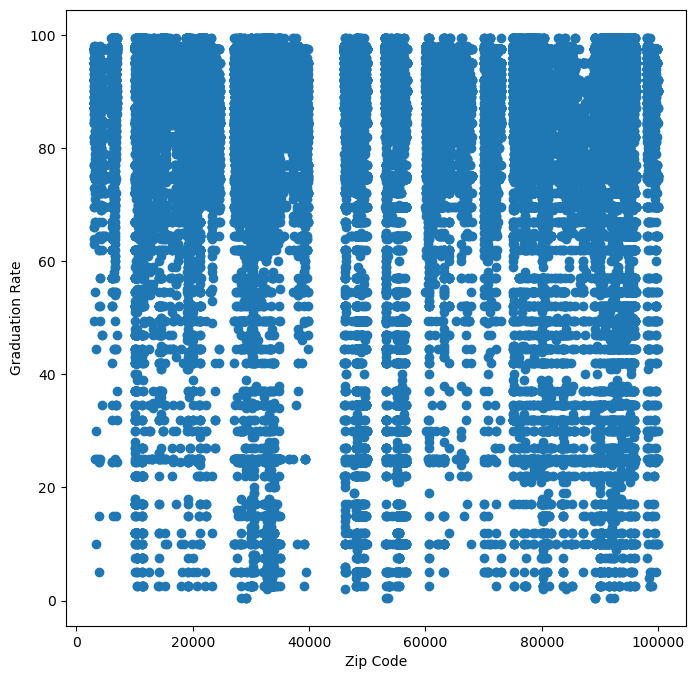

In [17]:
# Are the zip code and the graduation rate related in any obvious way?
plt.scatter(x=df['zip_location'],y=df['ALL_RATE_'])
plt.ylabel("Graduation Rate")
plt.xlabel("Zip Code")

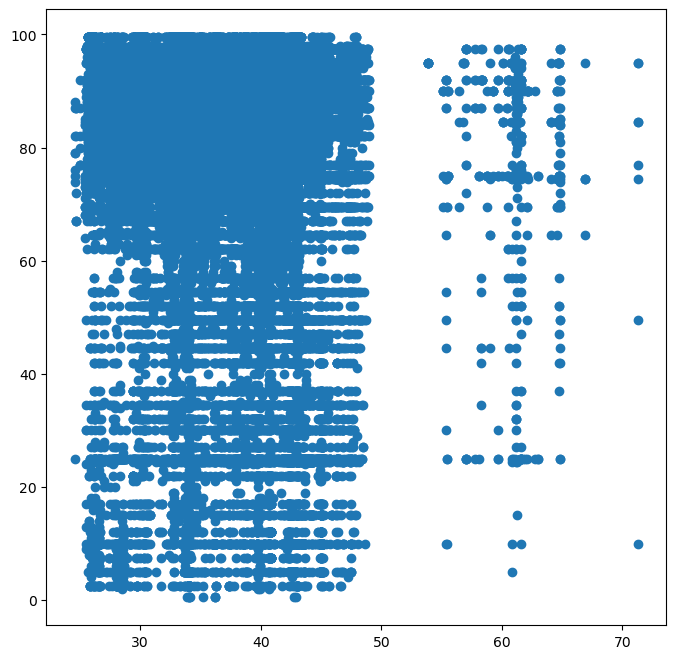

In [18]:
# Are the lattitude and the graduation rate related in any obvious way?
plt.scatter(x=df['latitude'],y=df['ALL_RATE_'])

In [19]:
df[['latitude','ALL_RATE_']].corr()

,latitude,ALL_RATE_
latitude,1.000000,-0.018376
ALL_RATE_,-0.018376,1.000000


,ALL_COHORT_,ALL_RATE_
ALL_COHORT_,1.000000,0.214289
ALL_RATE_,0.214289,1.000000


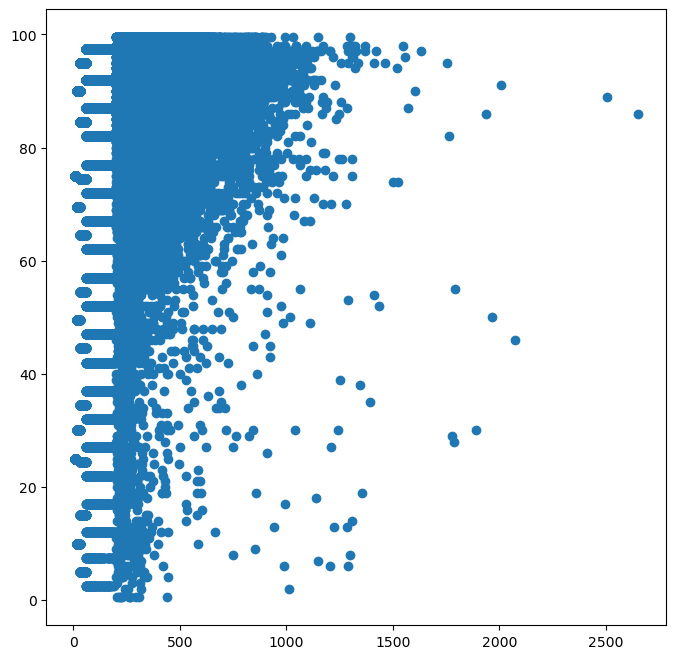

In [20]:
plt.scatter(x=df[['ALL_COHORT_']],y=df['ALL_RATE_'])
df[['ALL_COHORT_','ALL_RATE_']].corr()

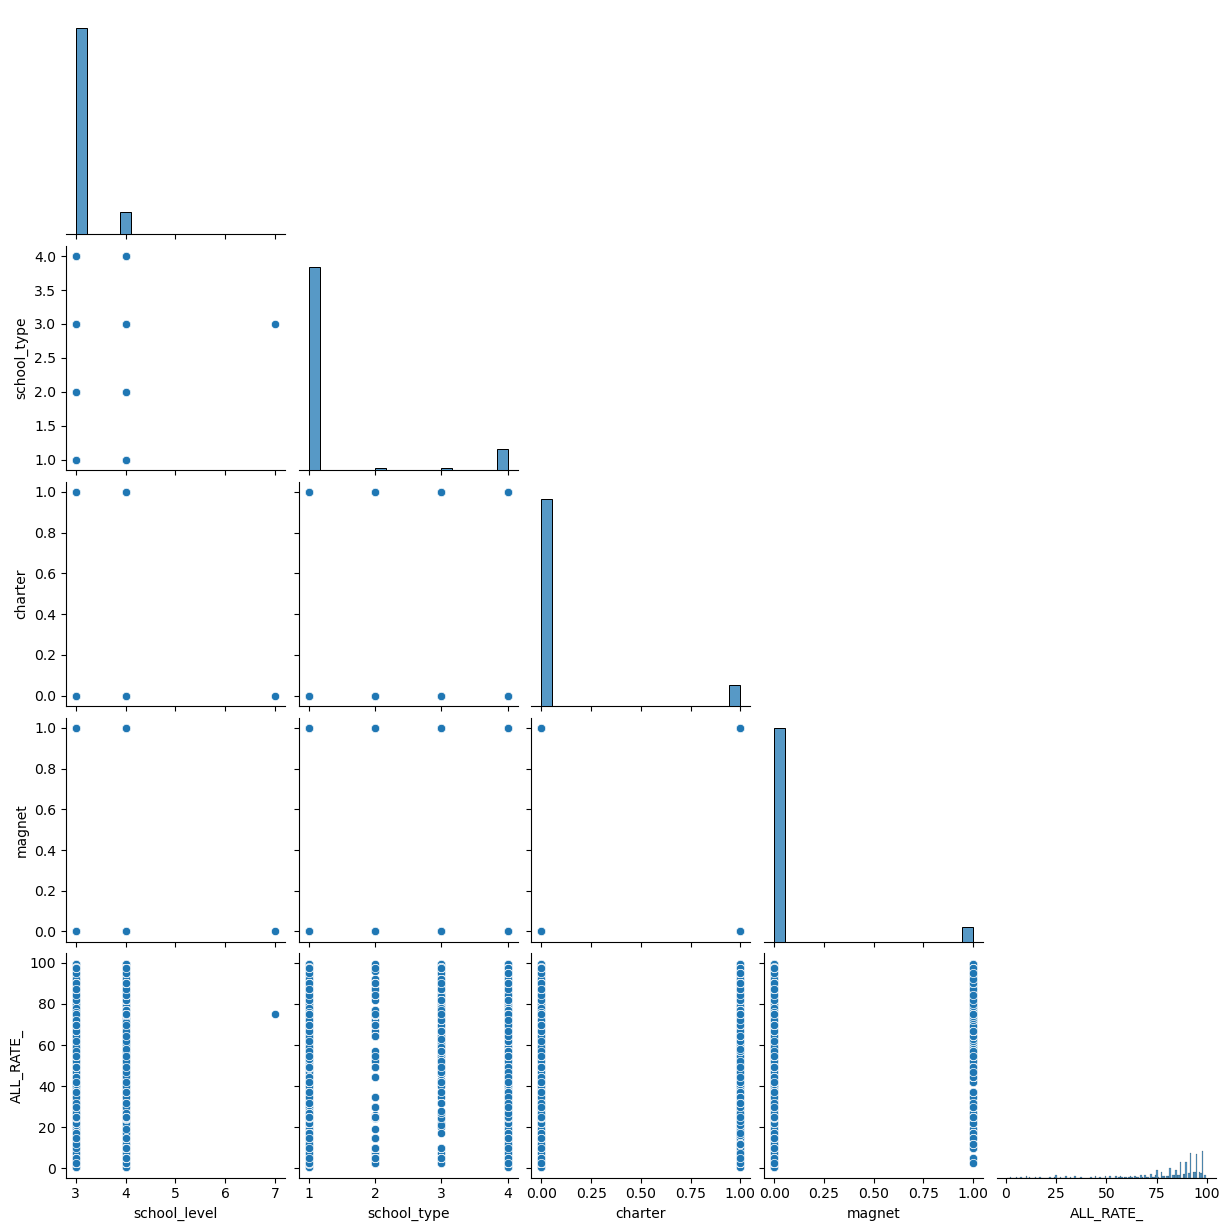

In [21]:
sns.pairplot(df[['school_level','school_type','charter','magnet','ALL_RATE_']],corner=True)

### One school is marked as a secondary school, with school_level == 7

In [22]:
df.query('school_level == 7')

,Year,STNAM,FIPST,LEAID,LEANM,NCESSCH,SCHNAM,ALL_COHORT_,school_name,zip_mailing,zip_location,latitude,urban_centric_locale,county_code,school_level,school_type,lowest_grade_offered,highest_grade_offered,title_i_status,title_i_eligible,charter,magnet,virtual,teachers_fte,free_lunch,reduced_price_lunch,free_or_reduced_price_lunch,enrollment,ungrade_cedp,Math_Pct_Part,Rla_Pct_Part,ALL_RATE_
79666,2018,NORTH CAROLINA,37,3702370,Johnston County Public Schools,370237003408,Johnston County Schools Career Technical,10,Johnston County Schools Career Technical,27577.0,27577.0,35.501959,41.0,37101.0,7.0,3.0,9.0,13.0,6.0,0.0,0.0,0.0,0.0,9.8,64.0,6.0,70.0,198.0,1.0,95.0,95.0,75.0


<AxesSubplot:xlabel='lowest_grade_offered', ylabel='ALL_RATE_'>

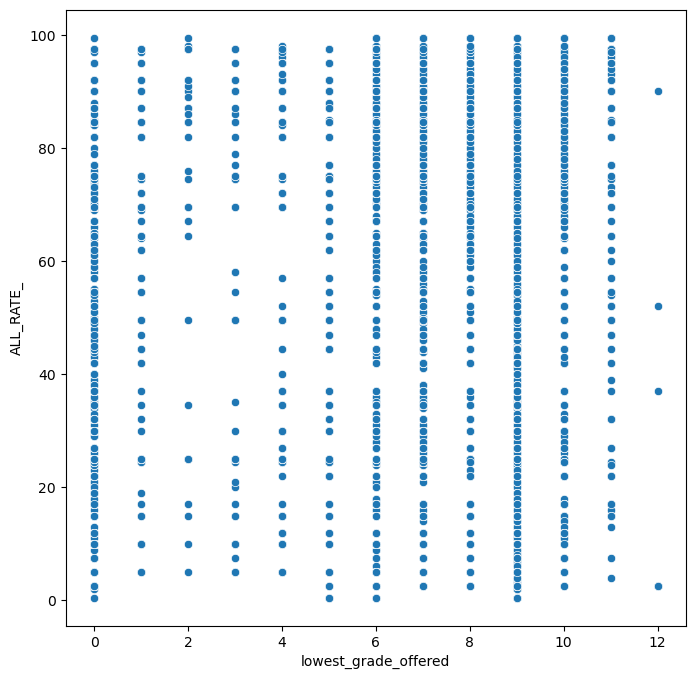

In [23]:
sns.scatterplot(x=df['lowest_grade_offered'],y=df['ALL_RATE_'])

In [24]:
# Check difference between highest and lowest grade offered versus grad rate.
# The fact that there are schools with lowest grade offered of 0 seems odd and needs to be investigated further.
df.lowest_grade_offered.describe()

count    83658.000000
mean         8.107390
std          2.046933
min          0.000000
25%          8.000000
50%          9.000000
75%          9.000000
max         12.000000
Name: lowest_grade_offered, dtype: float64

In [25]:
df.highest_grade_offered.describe()

count    83658.000000
mean        12.005283
std          0.072495
min         12.000000
25%         12.000000
50%         12.000000
75%         12.000000
max         13.000000
Name: highest_grade_offered, dtype: float64

# Save Dataset A locally for modeling

In [26]:
# Save out explored dataframe for modeling.
df.to_csv('../data/mergeA_for_modeling.csv',index=False)

# Dataset B